In [29]:
import pandas as pd
import numpy as np
import sklearn
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [102]:
def lower_value(column_names, importance):
    feat_imp = {'Feature': list(column_names), 'Importance': list(importance)}
    return list(pd.DataFrame(feat_imp).sort_values(by='Importance', ascending=False)['Feature'])[-1]

#lower_value(X_.columns, bst.feature_importances_)

'RainToday'

In [112]:
%%time
# Lista com o nome das variáveis
vars = df.drop(['RainTomorrow'], axis=1).columns.to_list()
y = df['RainTomorrow']

# definir a classe - sem variar os parâmetros
bst = XGBClassifier(n_estimators=60, max_depth=6, random_state=42)

# Listas para plot
x_numvar = []
y_metric = []

# Loop para iterar lista
while len(vars) > 1:

    # Ajustar X e y para treino
    X_ = df[vars] # Nome das variáveis
    X = X_.values
    
    # Validação cruzada para pegar score
    cv = cross_val_score(bst, X, y, cv=5, scoring='roc_auc').mean() # Aqui estou usando o accuracy como métrica
        
    # Salvar valor da métrica
    y_metric.append(cv)
    
    # Salvar número de variáveis
    x_numvar.append(len(vars))
    
    # Fittar o modelo
    bst.fit(X, y)
    
    # Pegar o feature_importance
    # Colocar o feature importance em uma lista (ordenado pela importância)
    drop_lower = lower_value(X_.columns, bst.feature_importances_)
    
    # Dropar a variável menos importante (última da lista de importância)
    vars.remove(drop_lower)


CPU times: user 30min 18s, sys: 3.02 s, total: 30min 21s
Wall time: 2min 36s


In [113]:
y_metric

[0.8431600514520937,
 0.8431600514520937,
 0.8439361063583286,
 0.8413585992427921,
 0.837395101361713,
 0.8370156781059558,
 0.8333834564953584,
 0.834899242695753,
 0.8345601207746499,
 0.8347503900565423,
 0.8302066674207655,
 0.8270054908108164,
 0.8223815688174602,
 0.8244310565395502,
 0.8640837888955337,
 0.8601984319221454,
 0.8582164919826779,
 0.8497820094619829,
 0.8386905465114489,
 0.829606674723216]

In [114]:
x_numvar

[21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2]

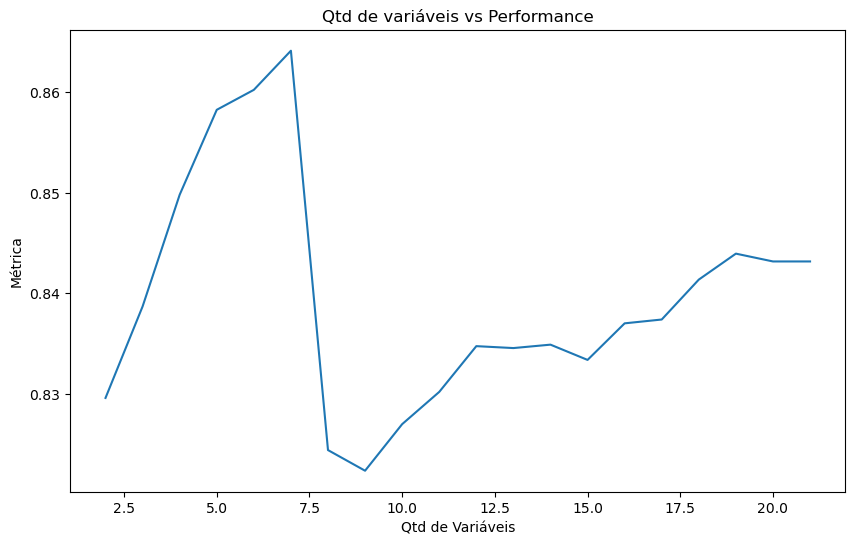

In [116]:
plt.figure(figsize=(10,6))
plt.plot(x_numvar, y_metric)
plt.title('Qtd de variáveis vs Performance')
plt.xlabel('Qtd de Variáveis')
plt.ylabel('Métrica')
plt.show()